# Heading 1 Sentiment Analysis 

In [106]:
# Dependencies to be imported.
import tweepy
import json
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret

#tweepy authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())
print(consumer_key)


MerM2ONWQ6jGImQsKR8WNOPsV


In [4]:
#Target user list
target_list=["BBC","CBS","CNN","FOX","nytimes"]
target_list




['BBC', 'CBS', 'CNN', 'FOX', 'nytimes']

In [5]:
#target_user= "@CNN"
#user_info = api.get_user(target_user)
#pprint(user_info)
#for user in user_info:
#print(json.dumps(user_info,sort_keys=True,indent=4))
for target in target_list:
    print(target)
    target_user = target
    print(target_user)

BBC
BBC
CBS
CBS
CNN
CNN
FOX
FOX
nytimes
nytimes


In [6]:
#Retrieve tweets for a target_user and store tweets in a list. 
#target_user= "@CNN"
#create empty list of recent tweets for each news org. 
tweet_acct=list()
tweet_texts=list()
tweet_time=list()
cnt = 0 
#Loop to the twitter feeds for the target organizations in target_list.
for target in target_list:
    print(target)
    target_user = target
    print(target_user)
    #Use loop for 5 pages.
    for i in range(1,6):
        print(str(i))
        all_tweets = api.user_timeline(target_user,page=i)
        #parse thru each tweet in cnn_tweets
        for tweet in all_tweets:
            cnt+=1
            #capture source acct.
            tweet_acct.append(tweet["user"]["screen_name"])
            #pprint(tweet)
            
            #capture and store the tweet text
            tweet_texts.append(tweet["text"])
            
            #capture the date and convert to datetime format. 
            #raw_time format is Wed Jun 27 13:05:07 +0000 2018
            #tweet_time format is 2018-06-27 13:05:07+00:00 
            raw_time = tweet["created_at"]
            conv_time = datetime.strptime(raw_time,"%a %b %d %H:%M:%S %z %Y")
            tweet_time.append(conv_time)
            ##print some values of user, tweet text and conv_time. 
            if cnt % 25 == 0:
                print(str(cnt))
                print(tweet["user"]["screen_name"])
                print(tweet["text"])
                print(str(conv_time))
        

BBC
BBC
1
2
25
BBC
Turns out you're biased in all sorts of ways you may not realise. https://t.co/yZ0ziOfX2L
2018-06-26 08:00:16+00:00
3
50
BBC
💔🦍 Koko the gorilla sadly passed away this week, aged 46.

This is the story of her life. https://t.co/rIRb7mHpJx
2018-06-24 13:03:02+00:00
4
75
BBC
RT @bbcstories: Today marks 70 years since the arrival of Caribbean migrants on the Empire Windrush ship to the UK.

 Back in 2018, how has…
2018-06-22 19:10:41+00:00
5
100
BBC
When a fire at a children's home in Guatemala killed dozens of teenage girls, it exposed a terrifying culture of ab… https://t.co/saKLWSu1NT
2018-06-21 08:01:01+00:00
CBS
CBS
1
2
125
CBS
RT @Aatamianphoto: Springsteen is on the #TonyAwards and I love it.
2018-06-11 02:47:29+00:00
3
150
CBS
Nathan Lane saw his #AngelsinAmerica role as a challenge. How will you challenge yourself in 2018? #TonyAwards https://t.co/3WXd6AqgBi
2018-06-11 01:08:24+00:00
4
175
CBS
These two know a thing or two about awards! Watch them light up the 

In [7]:
print(len(tweet_texts))
print(len(tweet_acct))
print(len(tweet_time))

500
500
500


In [8]:
#Run sentiment analyzer for each tweet for all target_texts
allcompound=list()
allpos=list()
allneu=list()
allneg=list()

for target_text in tweet_texts:
    results = analyzer.polarity_scores(target_text)
    allcompound.append(results["compound"])
    allpos.append(results["pos"])
    allneu.append(results["neu"])
    allneg.append(results["neg"])
    



In [11]:
print(str(len(allcompound)),str(len(allpos)),str(len(allneu)),str(len(allneg)) )



500 500 500 500


In [64]:
#Create a dictionary with the lists created above. 
tweetdict=dict()
tweetdict={"source_acct":tweet_acct,"tweet_text":tweet_texts,'tweet_date':tweet_time,
           "vader_compound":allcompound,"vader_positive":allpos,
           "vader_neutral":allneu,"vader_negative":allneg}
#Create Dataframe from the dict
tweet_df = pd.DataFrame(tweetdict)
tweet_df.iloc[400:410]


,source_acct,tweet_date,tweet_text,vader_compound,vader_negative,vader_neutral,vader_positive
400,nytimes,2018-06-27 15:49:03+00:00,Because Slack is down and you might have to ac...,0.0000,0.000,1.000,0.000
401,nytimes,2018-06-27 15:43:02+00:00,A police officer was charged with criminal hom...,-0.8271,0.401,0.599,0.000
402,nytimes,2018-06-27 15:33:04+00:00,RT @randyNYT: Notice the accent marks on Mexic...,0.0000,0.000,1.000,0.000
403,nytimes,2018-06-27 15:23:06+00:00,Germany probably advances in the World Cup wit...,-0.1406,0.126,0.771,0.103
404,nytimes,2018-06-27 15:13:03+00:00,"RT @HannaIngber: Our politics editor, @patrick...",0.3182,0.000,0.892,0.108
405,nytimes,2018-06-27 15:03:06+00:00,Russia demonstrated that one response to field...,-0.4019,0.137,0.863,0.000
406,nytimes,2018-06-27 14:58:26+00:00,RT @mattfleg: Was just going back through some...,-0.2204,0.075,0.925,0.000
407,nytimes,2018-06-27 14:43:02+00:00,"""The violent act of a fan is sad,"" she wrote, ...",-0.7140,0.218,0.727,0.055
408,nytimes,2018-06-27 14:33:06+00:00,Mexico and Sweden are hoping to clinch advance...,0.4215,0.000,0.865,0.135
409,nytimes,2018-06-27 14:23:04+00:00,RT @mwolgelenter: “The enemies of a meat-based...,-0.4404,0.149,0.791,0.060


In [18]:

tweet_df.to_csv("Data/Tweetanalysis.csv",index=False, header=True)

In [19]:
tweet_df.tail(5)

,source_acct,tweet_date,tweet_text,vader_compound,vader_negative,vader_neutral,vader_positive
495,nytimes,2018-06-26 20:08:03+00:00,"It was an afternoon of “God, fashion and polit...",0.2732,0.000,0.877,0.123
496,nytimes,2018-06-26 19:58:04+00:00,The arrest warrant for Rosa Parks shows that i...,-0.2263,0.100,0.837,0.063
497,nytimes,2018-06-26 19:57:04+00:00,Lionel Messi and Argentina took a dramatic and...,0.0000,0.000,1.000,0.000
498,nytimes,2018-06-26 19:48:08+00:00,Iceland’s Viking Thunder Clap is meant to conj...,-0.1531,0.092,0.845,0.063
499,nytimes,2018-06-26 19:38:03+00:00,RT @NYTMetro: The congressional primary on Tue...,0.0000,0.000,1.000,0.000


In [60]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#Retrieve the compound result from vader analysis for bbc.
bbc_compound_list = tweet_df.loc[tweet_df["source_acct"]=="BBC"]["vader_compound"].values
cbs_compound_list = tweet_df.loc[tweet_df["source_acct"]=="CBS"]["vader_compound"].values
cnn_compound_list = tweet_df.loc[tweet_df["source_acct"]=="CNN"]["vader_compound"].values
fox_compound_list = tweet_df.loc[tweet_df["source_acct"]=="fox"]["vader_compound"].values
nytimes_compound_list = tweet_df.loc[tweet_df["source_acct"]=="nytimes"]["vader_compound"].values
                                
#bbc_compound_list=bbc_compound.values
print(str(len(bbc_compound_list)),str(len(cbs_compound_list)),str(len(cnn_compound_list)),str(len(fox_compound_list)),
     str(len(nytimes_compound_list)))

100 100 100 100 100


In [82]:
#Determine mean of compound sentiment for each news org. 
bbc_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="BBC"]["vader_compound"].mean()
cbs_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="CBS"]["vader_compound"].mean()
cnn_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="CNN"]["vader_compound"].mean()
fox_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="fox"]["vader_compound"].mean()
nytimes_compound_avg = tweet_df.loc[tweet_df["source_acct"]=="nytimes"]["vader_compound"].mean()
avglist=[bbc_compound_avg,cbs_compound_avg,cnn_compound_avg,fox_compound_avg,nytimes_compound_avg]

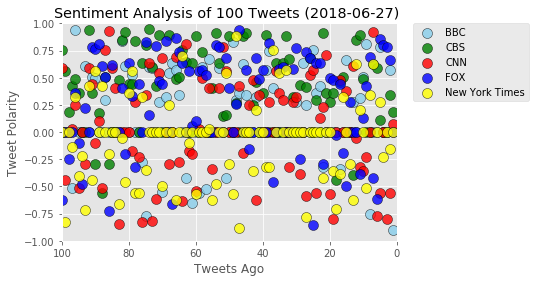

In [105]:
# Create plot
x_vals = range(100,0,-1)
#print(str(len(x_vals)))
y_valbbc= bbc_compound_list
y_valcbs= cbs_compound_list
y_valcnn= cnn_compound_list
y_valfox= fox_compound_list
y_valnyt= nytimes_compound_list
#plt.scatter(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8,color="skyblue",label=True,edgecolor="black")
#plt.scatter(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8,color="skyblue",label=True,edgecolor="green")
plt.scatter(x_vals,y_valbbc, marker="o", linewidth=0.5,alpha=0.8,color="skyblue",label="BBC",edgecolor="black",
            s=100)
plt.scatter(x_vals,y_valcbs, marker="o", linewidth=0.5,alpha=0.8,color="green",label="CBS",edgecolor="black",s=100)
plt.scatter(x_vals,y_valcnn, marker="o", linewidth=0.5,alpha=0.8,color="red",label="CNN",edgecolor="black",s=100)
plt.scatter(x_vals,y_valfox, marker="o", linewidth=0.5,alpha=0.8,color="blue",label="FOX",edgecolor="black",s=100)
plt.scatter(x_vals,y_valnyt, marker="o", linewidth=0.5,alpha=0.8,color="yellow",label="New York Times",edgecolor="black",
            s=100)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
#plt.legend(loc='upper right',markerscale=0.7, scatterpoints=1,)
plt.figure(figsize=(4,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(f"Sentiment Analysis of 100 Tweets ({now}) ")
plt.xlim([100,0]) 
plt.ylim(-1,+1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plt.tight_layout()
plt.savefig("Images/twitter_sentiment_scatter.png")

plt.show()

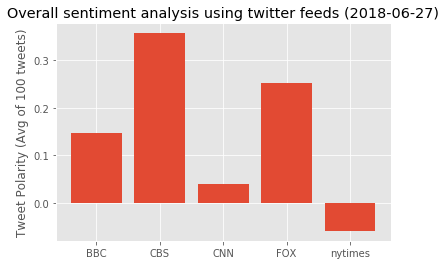

In [95]:
plt.bar(target_list,avglist)
plt.ylabel("Tweet Polarity (Avg of 100 tweets)" )
plt.title(f"Overall sentiment analysis using twitter feeds ({now})")
#plt.title(f"Sentiment Analysis of 100 Tweets ({now}) ")
now = datetime.now()
now = now.strftime("%Y-%m-%d")

plt.savefig("Images/twitter_analysis_bar.png")
plt.show()